In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder

In [3]:
data1 = pd.read_csv("obesity_level.csv")
data1

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,0be1dad
0,0,Male,24.443011,1.699998,81.669950,1,1,2.000000,2.983297,Sometimes,0,2.763573,0,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,1,1,2.000000,3.000000,Frequently,0,2.000000,0,1.000000,1.000000,0,Automobile,0rmal_Weight
2,2,Female,18.000000,1.711460,50.165754,1,1,1.880534,1.411685,Sometimes,0,1.910378,0,0.866045,1.673584,0,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,1,1,3.000000,3.000000,Sometimes,0,1.674061,0,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,1,1,2.679664,1.971472,Sometimes,0,1.979848,0,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20753,20753,Male,25.137087,1.766626,114.187096,1,1,2.919584,3.000000,Sometimes,0,2.151809,0,1.330519,0.196680,Sometimes,Public_Transportation,Obesity_Type_II
20754,20754,Male,18.000000,1.710000,50.000000,0,1,3.000000,4.000000,Frequently,0,1.000000,0,2.000000,1.000000,Sometimes,Public_Transportation,Insufficient_Weight
20755,20755,Male,20.101026,1.819557,105.580491,1,1,2.407817,3.000000,Sometimes,0,2.000000,0,1.158040,1.198439,0,Public_Transportation,Obesity_Type_II
20756,20756,Male,33.852953,1.700000,83.520113,1,1,2.671238,1.971472,Sometimes,0,2.144838,0,0.000000,0.973834,0,Automobile,Overweight_Level_II


In [3]:
data1 = data1.drop(columns="id")

In [4]:
data1.isnull().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
0be1dad                           0
dtype: int64

In [5]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          20758 non-null  object 
 1   Age                             20758 non-null  float64
 2   Height                          20758 non-null  float64
 3   Weight                          20758 non-null  float64
 4   family_history_with_overweight  20758 non-null  int64  
 5   FAVC                            20758 non-null  int64  
 6   FCVC                            20758 non-null  float64
 7   NCP                             20758 non-null  float64
 8   CAEC                            20758 non-null  object 
 9   SMOKE                           20758 non-null  int64  
 10  CH2O                            20758 non-null  float64
 11  SCC                             20758 non-null  int64  
 12  FAF                             

In [6]:
data2 = pd.read_csv("bodyfat.csv")
data2

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,1.0340,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,1.0736,11.0,70,134.25,67.00,34.9,89.2,83.6,88.8,49.6,34.8,21.5,25.6,25.7,18.5
248,1.0236,33.6,72,201.00,69.75,40.9,108.5,105.0,104.5,59.6,40.8,23.2,35.2,28.6,20.1
249,1.0328,29.3,72,186.75,66.00,38.9,111.1,111.5,101.7,60.3,37.3,21.5,31.3,27.2,18.0
250,1.0399,26.0,72,190.75,70.50,38.9,108.3,101.3,97.8,56.0,41.6,22.7,30.5,29.4,19.8


In [7]:
data2.head(10)

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,1.0340,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7
5,1.0502,20.9,24,210.25,74.75,39.0,104.5,94.4,107.8,66.0,42.0,25.6,35.7,30.6,18.8
6,1.0549,19.2,26,181.00,69.75,36.4,105.1,90.7,100.3,58.4,38.3,22.9,31.9,27.8,17.7
7,1.0704,12.4,25,176.00,72.50,37.8,99.6,88.5,97.1,60.0,39.4,23.2,30.5,29.0,18.8
8,1.0900,4.1,25,191.00,74.00,38.1,100.9,82.5,99.9,62.9,38.3,23.8,35.9,31.1,18.2
9,1.0722,11.7,23,198.25,73.50,42.1,99.6,88.6,104.1,63.1,41.7,25.0,35.6,30.0,19.2


In [8]:
data2.isnull().sum()

Density    0
BodyFat    0
Age        0
Weight     0
Height     0
Neck       0
Chest      0
Abdomen    0
Hip        0
Thigh      0
Knee       0
Ankle      0
Biceps     0
Forearm    0
Wrist      0
dtype: int64

In [9]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Density  252 non-null    float64
 1   BodyFat  252 non-null    float64
 2   Age      252 non-null    int64  
 3   Weight   252 non-null    float64
 4   Height   252 non-null    float64
 5   Neck     252 non-null    float64
 6   Chest    252 non-null    float64
 7   Abdomen  252 non-null    float64
 8   Hip      252 non-null    float64
 9   Thigh    252 non-null    float64
 10  Knee     252 non-null    float64
 11  Ankle    252 non-null    float64
 12  Biceps   252 non-null    float64
 13  Forearm  252 non-null    float64
 14  Wrist    252 non-null    float64
dtypes: float64(14), int64(1)
memory usage: 29.7 KB


In [10]:
data3 = pd.read_csv("final_dataset_BFP .csv")
data3

,Weight,Height,BMI,Body Fat Percentage,BFPcase,Gender,Age,BMIcase,Exercise Recommendation Plan
0,76.811975,1.820521,23.175956,18.281148,Acceptable,Male,29,normal,4
1,77.721154,1.945498,20.534184,13.731021,Fitness,Male,23,normal,4
2,87.558726,1.742754,28.828859,42.304631,Obese,Female,57,over weight,5
3,89.473356,1.758318,28.940017,27.958021,Obese,Male,41,over weight,5
4,69.963943,1.722570,23.578732,16.464478,Fitness,Male,19,normal,4
...,...,...,...,...,...,...,...,...,...
4995,87.003054,1.902891,24.027404,16.772884,Fitness,Male,18,normal,4
4996,92.121555,1.779346,29.096464,30.215757,Obese,Male,50,over weight,5
4997,105.298845,1.972883,27.053345,31.214014,Obese,Male,65,over weight,5
4998,90.411999,1.803409,27.799528,29.579434,Obese,Male,54,over weight,5


In [11]:
data3.isnull().sum()

Weight                          0
Height                          0
BMI                             0
Body Fat Percentage             0
BFPcase                         0
Gender                          0
Age                             0
BMIcase                         0
Exercise Recommendation Plan    0
dtype: int64

In [12]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Weight                        5000 non-null   float64
 1   Height                        5000 non-null   float64
 2   BMI                           5000 non-null   float64
 3   Body Fat Percentage           5000 non-null   float64
 4   BFPcase                       5000 non-null   object 
 5   Gender                        5000 non-null   object 
 6   Age                           5000 non-null   int64  
 7   BMIcase                       5000 non-null   object 
 8   Exercise Recommendation Plan  5000 non-null   int64  
dtypes: float64(4), int64(2), object(3)
memory usage: 351.7+ KB


EDA

In [13]:
import seaborn as sns

data1

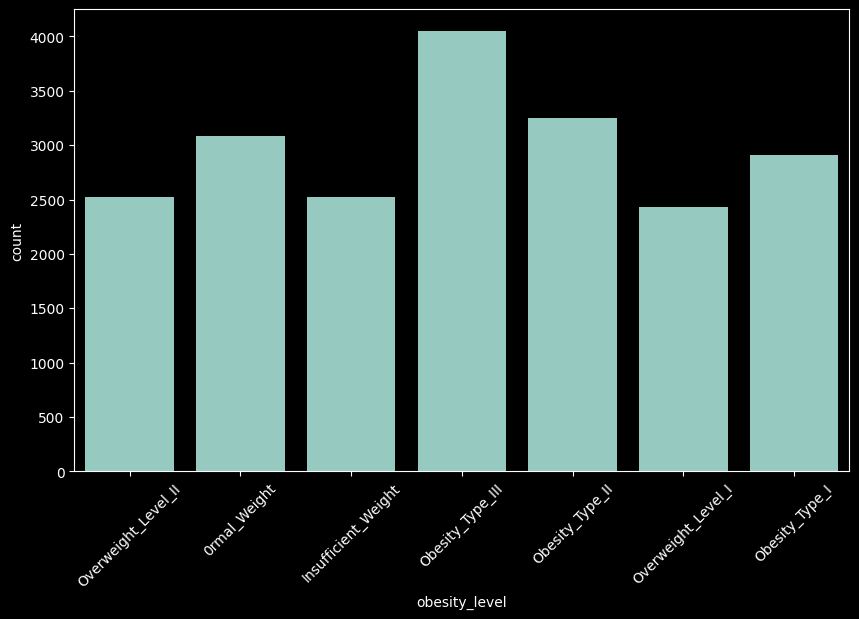

In [14]:
data1.rename(columns={"0be1dad":"obesity_level"},inplace=True)
plt.figure(figsize=(10,6))
sns.countplot(x="obesity_level",data=data1)
plt.xticks(rotation=45)
plt.show()

In [15]:
categoricals = ["family_history_with_overweight", "FAVC",
               "SMOKE", "SCC", "CALC", "MTRANS", "obesity_level"]

numericals = ["Age", "Height", "Weight", "FCVC", "NCP",
             "CH2O", "FAF", "TUE"]

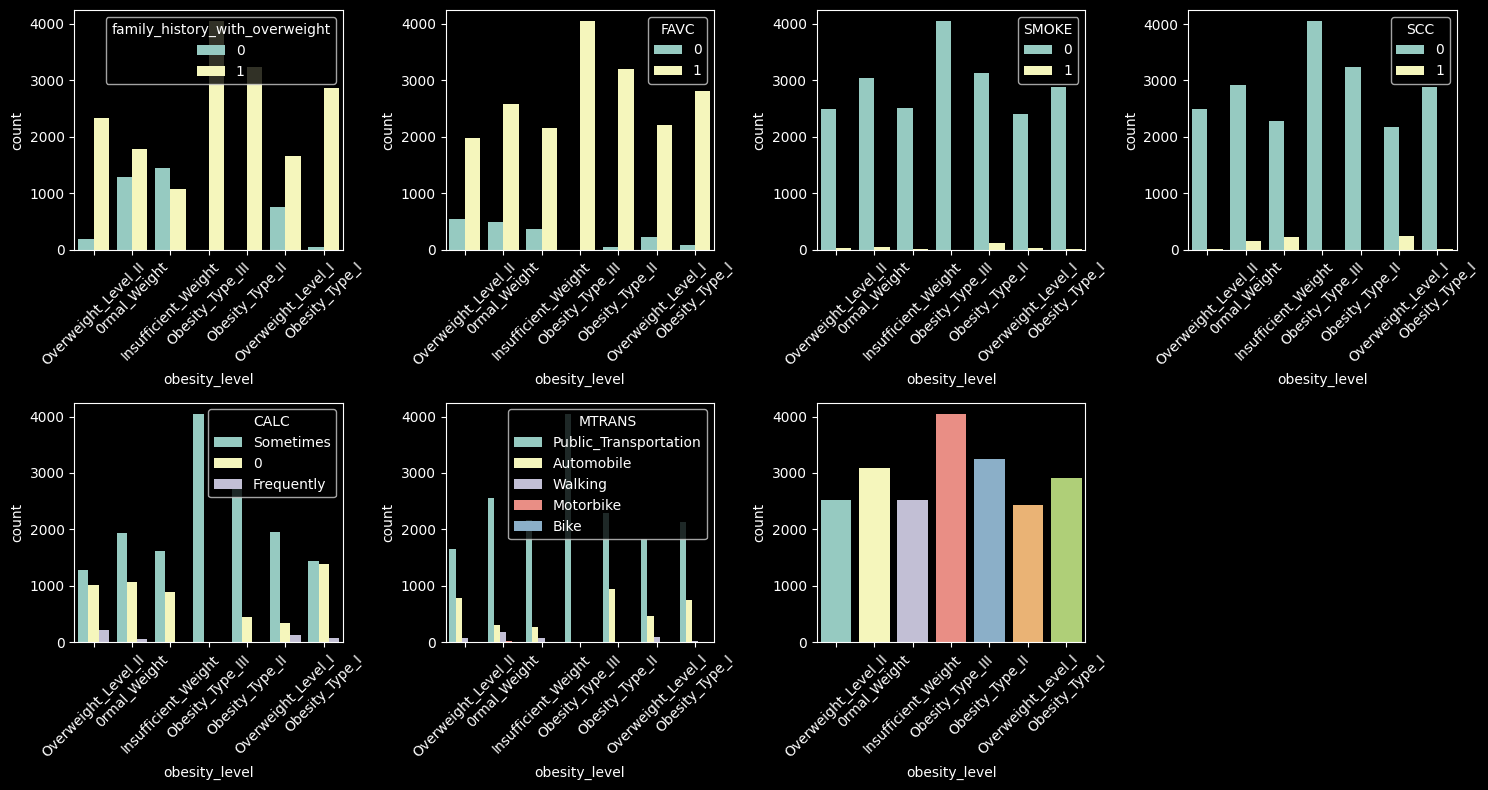

In [16]:
plt.figure(figsize=(15, 8))

for i, col in enumerate(categoricals, 1):
    plt.subplot(2, 4, i)
    sns.countplot(x="obesity_level", hue=col, data=data1)
    plt.xticks(rotation=45)  # Rotate x-axis labels

plt.tight_layout()  
plt.show()

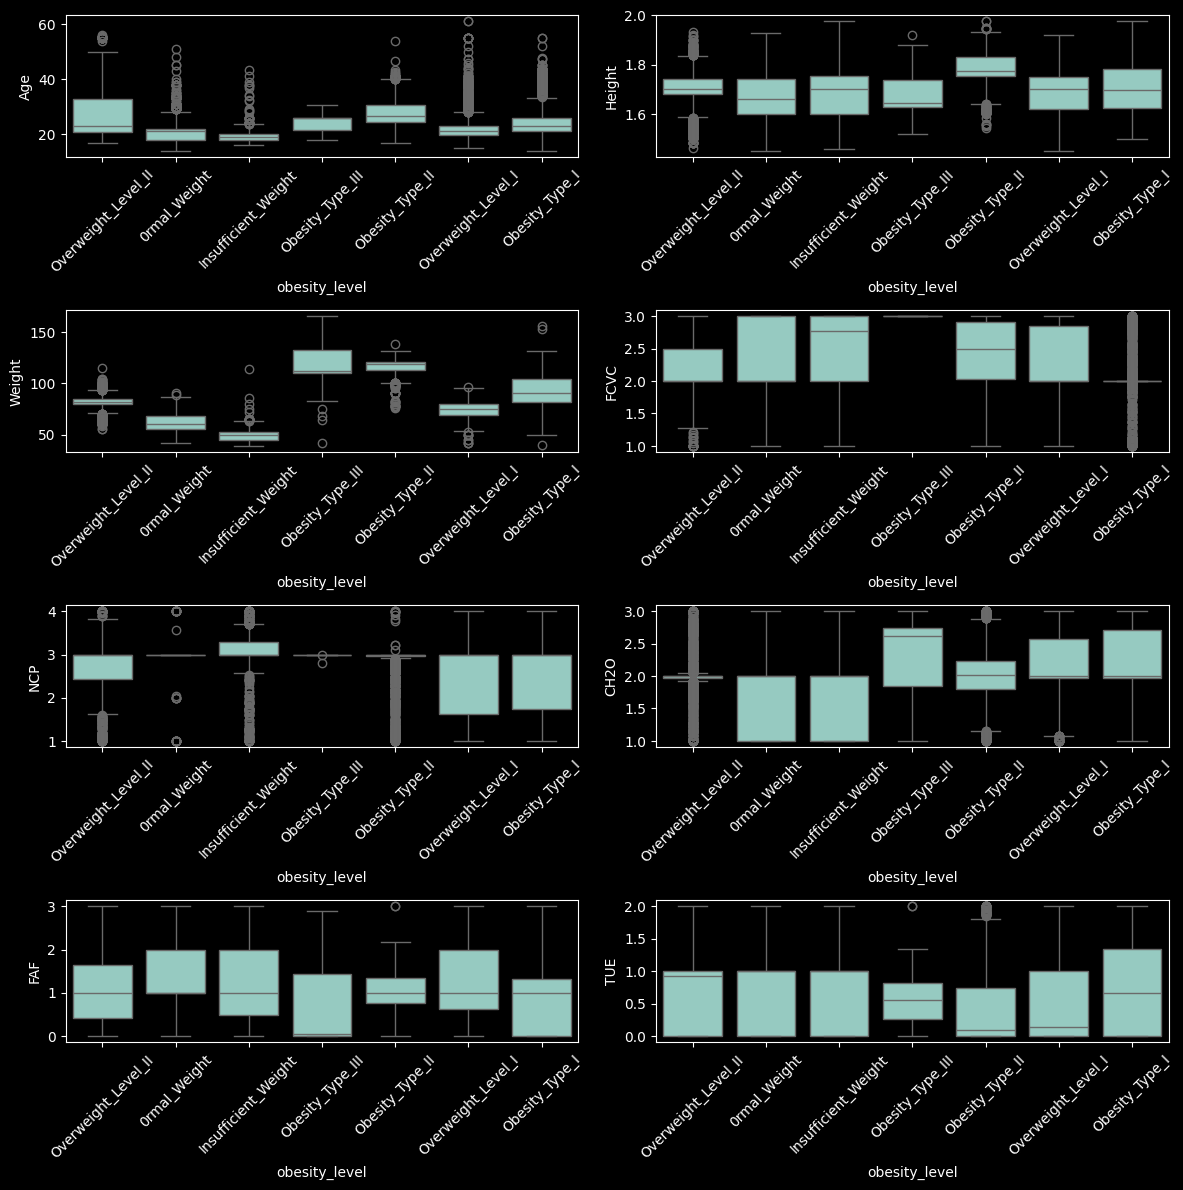

In [17]:
plt.figure(figsize=(12,12))

for i,col in enumerate(numericals, 1):
    plt.subplot(4,2,i)
    sns.boxplot(x="obesity_level", y=col, data=data1)
    plt.xticks(rotation=45)
    
plt.tight_layout()
plt.show()

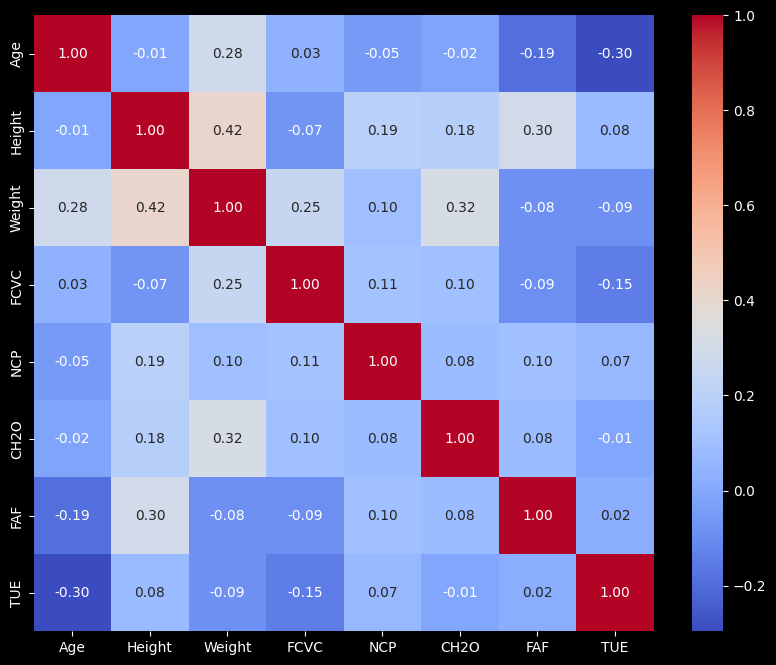

In [18]:
plt.figure(figsize=(10, 8))
sns.heatmap(data1[numericals].corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.show()

data2

Text(0.5, 0.98, 'Visualizing Continuous Columns')

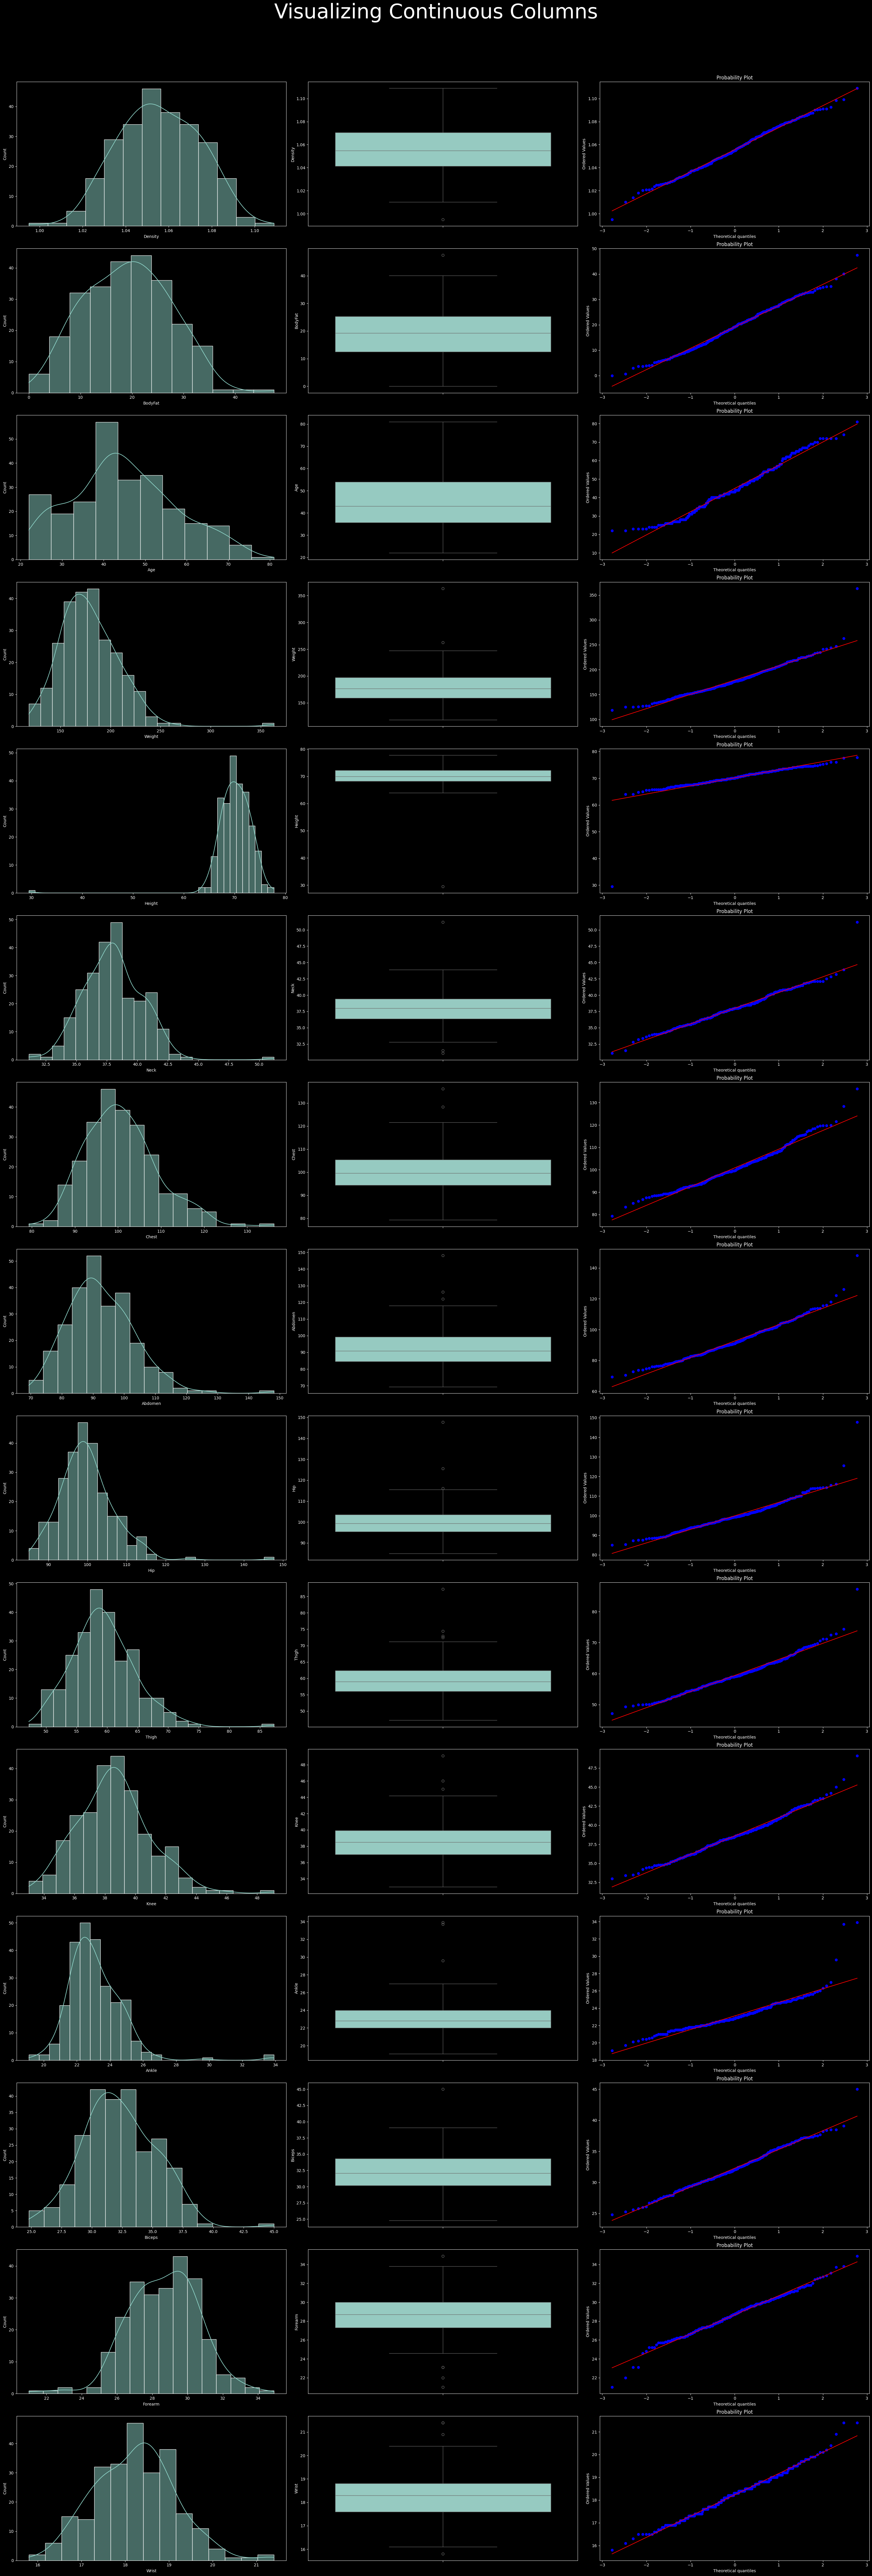

In [19]:
import scipy.stats as stats
fig,ax = plt.subplots(15,3,figsize=(30,90))
for index,i in enumerate(data2.columns):
    sns.histplot(data2[i],ax=ax[index,0],kde=True)
    sns.boxplot(data2[i],ax=ax[index,1])
    stats.probplot(data2[i],plot=ax[index,2])
    
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.suptitle("Visualizing Continuous Columns",fontsize=50)


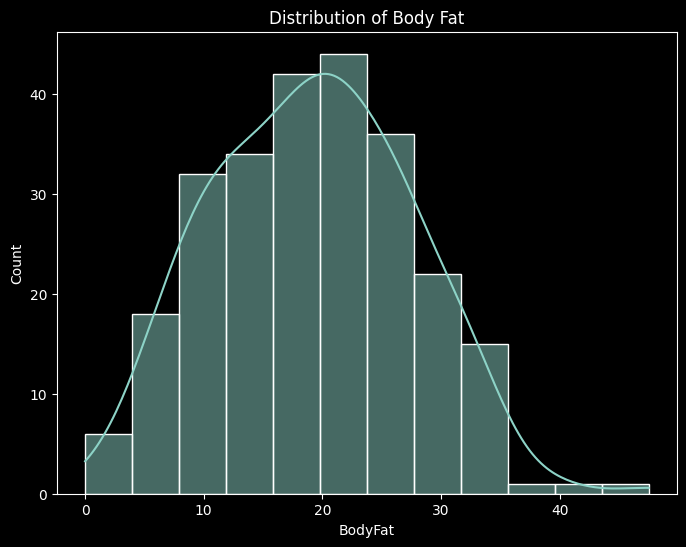

In [20]:
plt.figure(figsize=(8, 6))
sns.histplot(data=data2, x='BodyFat', kde=True)
plt.title('Distribution of Body Fat')
plt.show()

<Axes: >

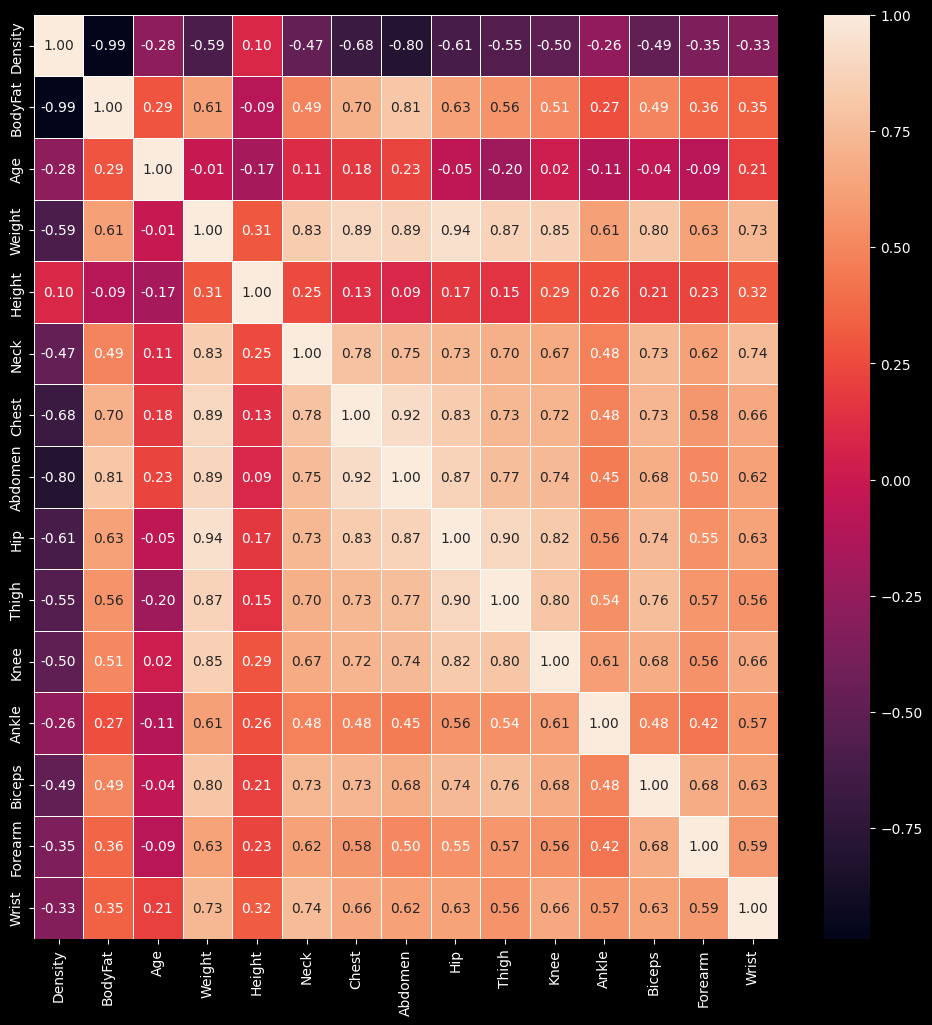

In [21]:
plt.figure(figsize=(12,12))
sns.heatmap(data2.corr(),annot=True,linewidth=0.5,fmt="0.2f")

data3

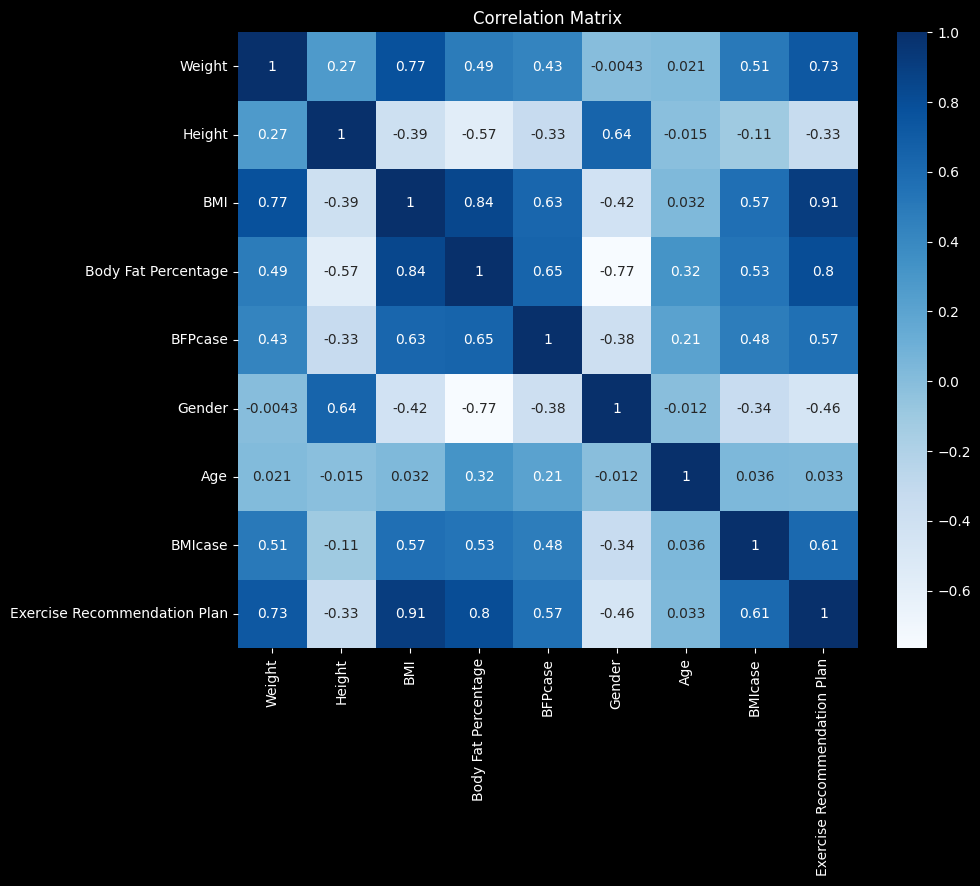

In [44]:
plt.figure(figsize=(10, 8))
sns.heatmap(data3.corr(), annot=True, cmap='Blues')
plt.title('Correlation Matrix')
plt.show()

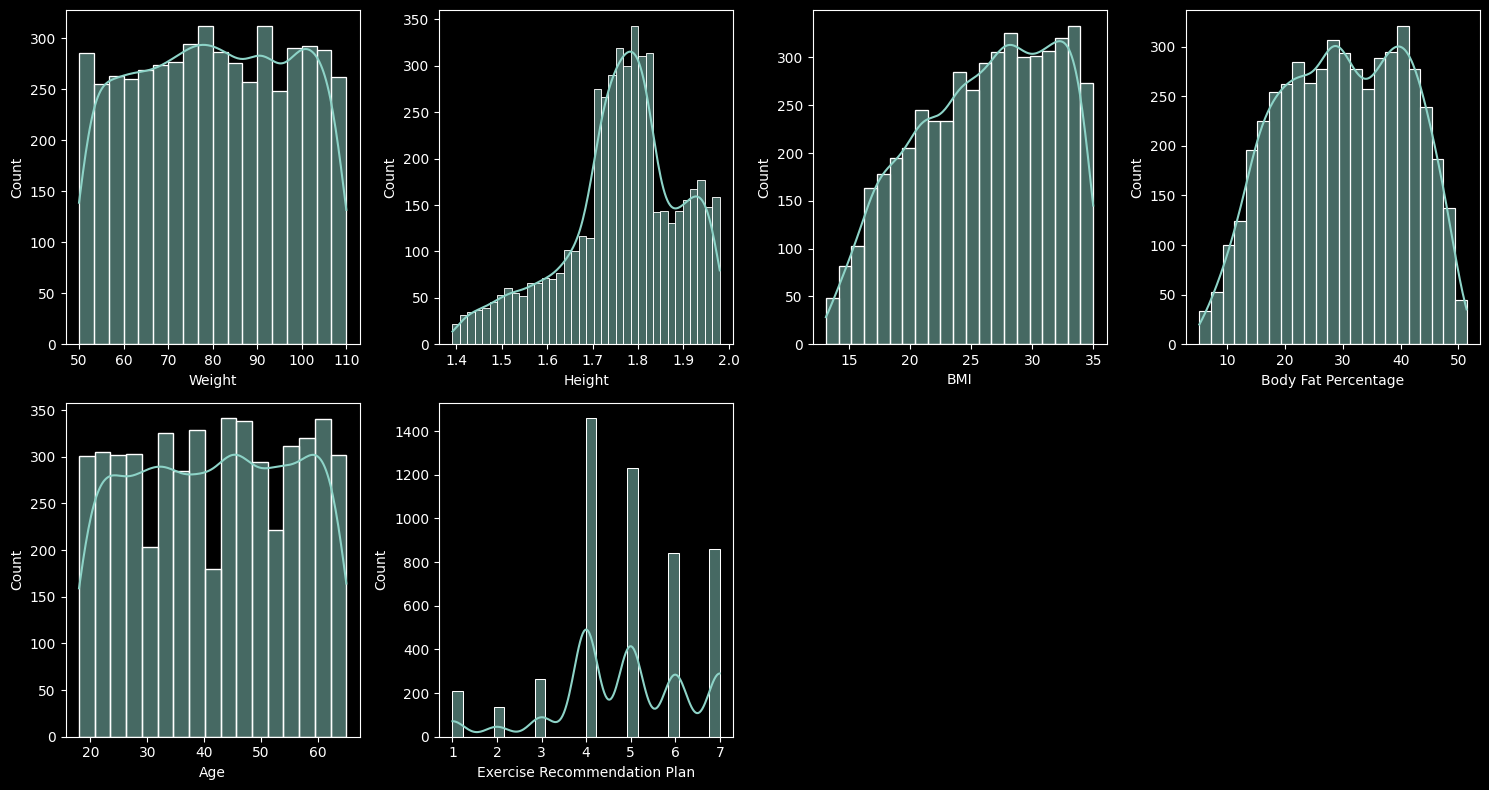

In [27]:
import math

num_cols = len(data3.select_dtypes(include=['float64', 'int64']).columns)
num_figs = math.ceil(num_cols / 8)  # Calculate the number of figures needed

for fig_idx in range(num_figs):
    plt.figure(figsize=(15, 8))
    start_idx = fig_idx * 8
    end_idx = min(start_idx + 8, num_cols)
    cols = data3.select_dtypes(include=['float64', 'int64']).columns[start_idx:end_idx]
    
    for i, col in enumerate(cols):
        plt.subplot(2, 4, i+1)
        sns.histplot(data=data3, x=col, kde=True)
        plt.tight_layout()
    plt.show()

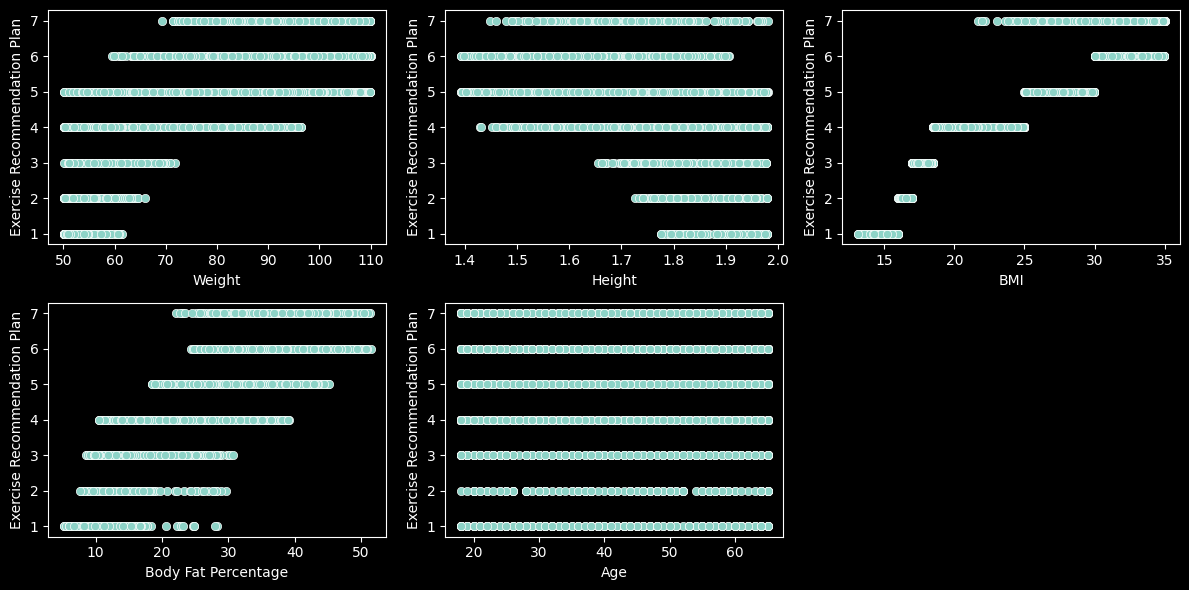

In [30]:
categorical_cols = ['BMIcase', 'BFPcase', 'Gender']
numerical_cols = ['Weight', 'Height', 'BMI', 'Body Fat Percentage', 'Age']

label_encoder = LabelEncoder()
for col in categorical_cols:
    data3[col] = label_encoder.fit_transform(data3[col])

plt.figure(figsize=(12, 6))
for i, col in enumerate(numerical_cols):
    plt.subplot(2, 3, i+1)
    sns.scatterplot(data=data3, x=col, y='Exercise Recommendation Plan')
    plt.xlabel(col)
    plt.ylabel('Exercise Recommendation Plan')
    plt.tight_layout()
plt.show()

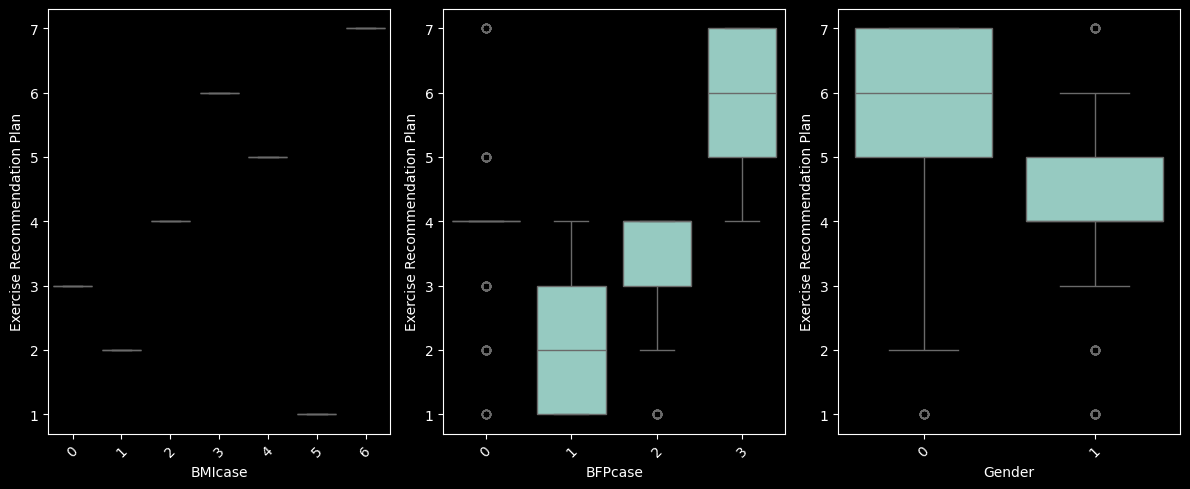

In [31]:
plt.figure(figsize=(12, 5))
for i, col in enumerate(categorical_cols):
    plt.subplot(1, 3, i+1)
    sns.boxplot(data=data3, x=col, y='Exercise Recommendation Plan')
    plt.xlabel(col)
    plt.ylabel('Exercise Recommendation Plan')
    plt.xticks(rotation=45)
    plt.tight_layout()
plt.show()

In [32]:
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,  mean_squared_error

In [33]:
X = data2.drop(['BodyFat','Density'],axis=1)
y = data2['Density']

Feature Engineering and Preprocessing

In [34]:
X['Bmi']=703*X['Weight']/(X['Height']*X['Height'])
X.head()

,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist,Bmi
0,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1,23.624460
1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2,23.332048
2,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6,24.666315
3,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2,24.880784
4,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7,25.514854


In [35]:
X['ACratio'] = X['Abdomen']/X['Chest']
X['HTratio'] = X['Hip']/X['Thigh']
X.drop(['Weight','Height','Abdomen','Chest','Hip','Thigh'],axis=1,inplace=True)
X.head()

,Age,Neck,Knee,Ankle,Biceps,Forearm,Wrist,Bmi,ACratio,HTratio
0,23,36.2,37.3,21.9,32.0,27.4,17.1,23.624460,0.915145,1.601695
1,22,38.5,37.3,23.4,30.5,28.9,18.2,23.332048,0.886752,1.681431
2,22,34.0,38.9,24.0,28.8,25.2,16.6,24.666315,0.917537,1.664430
3,26,37.4,37.3,22.8,32.4,29.4,18.2,24.880784,0.848723,1.683860
4,24,34.4,42.2,24.0,32.2,27.7,17.7,25.514854,1.027749,1.612342


In [36]:
#removing outliers
z = np.abs(stats.zscore(X))
 
X_clean = X[(z<3).all(axis=1)]
y_clean = y[(z<3).all(axis=1)]
 
X_clean.shape

(242, 10)

In [37]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_clean,y_clean,random_state=42)

trans = PowerTransformer()
X_train = trans.fit_transform(X_train)
X_test = trans.transform(X_test)

Model Building

In [38]:
model = LinearRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
r2=r2_score(y_test,y_pred)
rmse=np.sqrt(mean_squared_error(y_test,y_pred))
print(r2)
print(rmse)

0.7384666193188041
0.010085459553433821


Text(0.5, 1.0, 'Actual Vs Predicted')

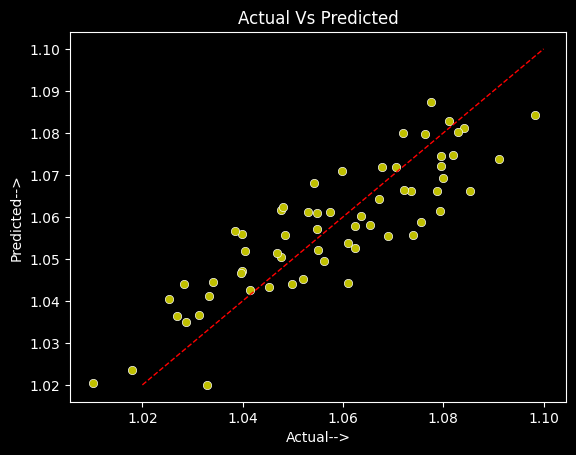

In [39]:
y_pred = model.predict(X_test)
sns.scatterplot(x=y_test,y=y_pred, color='y')
plt.plot([1.02, 1.10], [1.02, 1.10], color = 'red',linestyle='--',linewidth=1)
plt.xlabel("Actual-->")
plt.ylabel("Predicted-->")
plt.title("Actual Vs Predicted")

Predicting body fat percentage

In [40]:
# % Body Fat = (495 / Body Density) - 450
def predict(values):
    density = model.predict(values)
    fat = ((4.95/density[0]) - 4.5)*100
    print(f'Density: {density[0]} g/cc\nPercentage Body Fat: {fat} %\n')

predict(X_test[2].reshape(1,-1))

Density: 1.0615895826370119 g/cc
Percentage Body Fat: 16.28189282943895 %



Prediction of obesity level

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report

# Separate features and target
features = data1[categoricals + numericals]
target = data1['obesity_level']

# Encode categorical features
label_encoder = LabelEncoder()
for col in categoricals:
    features[col] = label_encoder.fit_transform(features[col])

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.25, random_state=42)

# Create and train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.5f}")
print(classification_report(y_test, y_pred))

C:\Users\BHUMI\AppData\Local\Temp\ipykernel_23800\784654969.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features[col] = label_encoder.fit_transform(features[col])
C:\Users\BHUMI\AppData\Local\Temp\ipykernel_23800\784654969.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features[col] = label_encoder.fit_transform(features[col])
C:\Users\BHUMI\AppData\Local\Temp\ipykernel_23800\784654969.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using

Accuracy: 0.99884
                     precision    recall  f1-score   support

       0rmal_Weight       1.00      1.00      1.00       780
Insufficient_Weight       1.00      1.00      1.00       640
     Obesity_Type_I       1.00      1.00      1.00       685
    Obesity_Type_II       1.00      1.00      1.00       825
   Obesity_Type_III       1.00      1.00      1.00      1017
 Overweight_Level_I       1.00      1.00      1.00       611
Overweight_Level_II       1.00      1.00      1.00       632

           accuracy                           1.00      5190
          macro avg       1.00      1.00      1.00      5190
       weighted avg       1.00      1.00      1.00      5190



Exercise Recommendation Plan

In [42]:
from sklearn.tree import DecisionTreeClassifier

X = data3.drop('Exercise Recommendation Plan', axis=1)
y = data3['Exercise Recommendation Plan']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train, y_train)

y_pred = dt_clf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.998

Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        55
           2       1.00      0.94      0.97        31
           3       0.96      1.00      0.98        48
           4       1.00      1.00      1.00       309
           5       1.00      1.00      1.00       237
           6       1.00      1.00      1.00       161
           7       1.00      1.00      1.00       159

    accuracy                           1.00      1000
   macro avg       0.99      0.99      0.99      1000
weighted avg       1.00      1.00      1.00      1000

